# Retreiving static metro data via LAMetro API

In [1]:
from collections import defaultdict
import json, requests
import pprint
import math
#from collections import namedtuple
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
#from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
#Getting all agencies
res = requests.get("https://api.metro.net/agencies/")
print(res.json())



[{'id': 'lametro', 'localtime': '2020-08-11 21:18:55.255394', 'display_name': 'Los Angeles Metro'}, {'id': 'lametro-rail', 'localtime': '2020-08-11 21:18:55.255413', 'display_name': 'Los Angeles Metro Rail'}]


In [3]:
#LA Metro agency
agency = 'lametro-rail'

In [4]:
#Getting the routes
res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/")
print(res.json())


{'items': [{'display_name': 'Metro A Line (blue)', 'id': '801'}, {'display_name': 'Metro B Line (red)', 'id': '802'}, {'display_name': 'Metro C Line (green)', 'id': '803'}, {'display_name': 'Metro L Line (gold)', 'id': '804'}, {'display_name': 'Metro D Line (purple)', 'id': '805'}, {'display_name': 'Metro E Line (expo)', 'id': '806'}]}


In [5]:
#Storing the routes

routes = {}
for route in res.json()['items']:
    route_data = route['display_name'].split()
    routes[route['id']] = {'name': route_data[1], 'color': route_data[3].lstrip('(').rstrip(')')}
pprint.pprint(routes)

print("")
route_tags = list(routes.keys())
routes['806']['color'] = 'cyan'
pprint.pprint(route_tags)

{'801': {'color': 'blue', 'name': 'A'},
 '802': {'color': 'red', 'name': 'B'},
 '803': {'color': 'green', 'name': 'C'},
 '804': {'color': 'gold', 'name': 'L'},
 '805': {'color': 'purple', 'name': 'D'},
 '806': {'color': 'expo', 'name': 'E'}}

['801', '802', '803', '804', '805', '806']


In [6]:
#Getting the runs for each route
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/runs/")
    print(res.json())
    print("***********")
    print()


{'items': [{'display_name': '801 - Downtown Long Beach Station', 'direction_name': '1', 'display_in_ui': True, 'route_id': '801_1_var0', 'id': '801_1_var0'}, {'display_name': '801 - 7th Street / Metro Center Station', 'direction_name': '0', 'display_in_ui': True, 'route_id': '801_0_var0', 'id': '801_0_var0'}]}
***********

{'items': [{'id': '802_0_var0', 'direction_name': '0', 'display_in_ui': True, 'route_id': '802_0_var0', 'display_name': '802 - Union Station / Downtown La'}, {'id': '802_1_var0', 'direction_name': '1', 'display_in_ui': True, 'route_id': '802_1_var0', 'display_name': '802 - North Hollywood Station'}]}
***********

{'items': [{'display_name': '803 - Norwalk Station', 'direction_name': '0', 'display_in_ui': True, 'route_id': '803_0_var0', 'id': '803_0_var0'}, {'display_name': '803 - Redondo Beach Station', 'direction_name': '1', 'display_in_ui': True, 'route_id': '803_1_var0', 'id': '803_1_var0'}]}
***********

{'items': [{'display_name': '804 - Azusa / Citrus', 'direct

In [7]:
#Storing the runs for each route
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/runs/")
    routes[route]['run_id'] = {}
    for run in res.json()['items']:
        routes[route]['run_id'][run['direction_name']] =  run['id']
pprint.pprint(routes)

{'801': {'color': 'blue',
         'name': 'A',
         'run_id': {'0': '801_0_var0', '1': '801_1_var0'}},
 '802': {'color': 'red',
         'name': 'B',
         'run_id': {'0': '802_0_var0', '1': '802_1_var0'}},
 '803': {'color': 'green',
         'name': 'C',
         'run_id': {'0': '803_0_var0', '1': '803_1_var0'}},
 '804': {'color': 'gold',
         'name': 'L',
         'run_id': {'0': '804_0_var0', '1': '804_1_var0'}},
 '805': {'color': 'purple',
         'name': 'D',
         'run_id': {'0': '805_0_var0', '1': '805_1_var0'}},
 '806': {'color': 'cyan',
         'name': 'E',
         'run_id': {'0': '806_0_var0', '1': '806_1_var0'}}}


In [8]:
#Getting the sequence of stops for each route
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/sequence/")
    print(res.json())
    print("***********")
    print()


{'items': [{'display_name': '7th Street / Metro Center Station - Metro A Line (Blue) & E Line (Expo)', 'longitude': -118.25882, 'latitude': 34.0486099, 'id': '80122'}, {'display_name': 'Pico Station', 'longitude': -118.26612, 'latitude': 34.0407299, 'id': '80121'}, {'display_name': 'Grand / Lattc Station', 'longitude': -118.26933, 'latitude': 34.0331599, 'id': '80120'}, {'display_name': 'San Pedro Street Station', 'longitude': -118.2555, 'latitude': 34.0268099, 'id': '80119'}, {'display_name': 'Washington Station', 'longitude': -118.24308, 'latitude': 34.0196499, 'id': '80118'}, {'display_name': 'Vernon Station', 'longitude': -118.2433, 'latitude': 34.0029199, 'id': '80117'}, {'display_name': 'Slauson Station', 'longitude': -118.2434, 'latitude': 33.9887599, 'id': '80116'}, {'display_name': 'Florence Station', 'longitude': -118.24327, 'latitude': 33.9737399, 'id': '80115'}, {'display_name': 'Firestone Station', 'longitude': -118.2432, 'latitude': 33.9596099, 'id': '80114'}, {'display_n

{'items': [{'id': '80139', 'display_name': 'Downtown Santa Monica Station', 'latitude': 34.0140099, 'longitude': -118.49138}, {'id': '80138', 'display_name': '17th Street / Smc Station', 'latitude': 34.0231599, 'longitude': -118.48037}, {'id': '80137', 'display_name': '26th Street / Bergamot Station', 'latitude': 34.0279899, 'longitude': -118.46912}, {'id': '80136', 'display_name': 'Expo / Bundy Station', 'latitude': 34.0317099, 'longitude': -118.4529}, {'id': '80135', 'display_name': 'Expo / Sepulveda Station', 'latitude': 34.0354099, 'longitude': -118.43423}, {'id': '80134', 'display_name': 'Westwood / Rancho Park Station', 'latitude': 34.0368199, 'longitude': -118.42458}, {'id': '80133', 'display_name': 'Palms Station', 'latitude': 34.0293199, 'longitude': -118.40425}, {'id': '80132', 'display_name': 'Culver City Station', 'latitude': 34.0278999, 'longitude': -118.38899}, {'id': '80131', 'display_name': 'La Cienega / Jefferson Station', 'latitude': 34.0263599, 'longitude': -118.3721

In [9]:
#Storing the sequence of stops for each route
stops = {}
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/sequence/")
    stops[route] = []
    for stop_details in res.json()['items']:
        stops[route].append(stop_details)
pprint.pprint(stops)

{'801': [{'display_name': '7th Street / Metro Center Station - Metro A Line '
                          '(Blue) & E Line (Expo)',
          'id': '80122',
          'latitude': 34.0486099,
          'longitude': -118.25882},
         {'display_name': 'Pico Station',
          'id': '80121',
          'latitude': 34.0407299,
          'longitude': -118.26612},
         {'display_name': 'Grand / Lattc Station',
          'id': '80120',
          'latitude': 34.0331599,
          'longitude': -118.26933},
         {'display_name': 'San Pedro Street Station',
          'id': '80119',
          'latitude': 34.0268099,
          'longitude': -118.2555},
         {'display_name': 'Washington Station',
          'id': '80118',
          'latitude': 34.0196499,
          'longitude': -118.24308},
         {'display_name': 'Vernon Station',
          'id': '80117',
          'latitude': 34.0029199,
          'longitude': -118.2433},
         {'display_name': 'Slauson Station',
          'id': '8

# A map plot of the LAMetro-rail routes

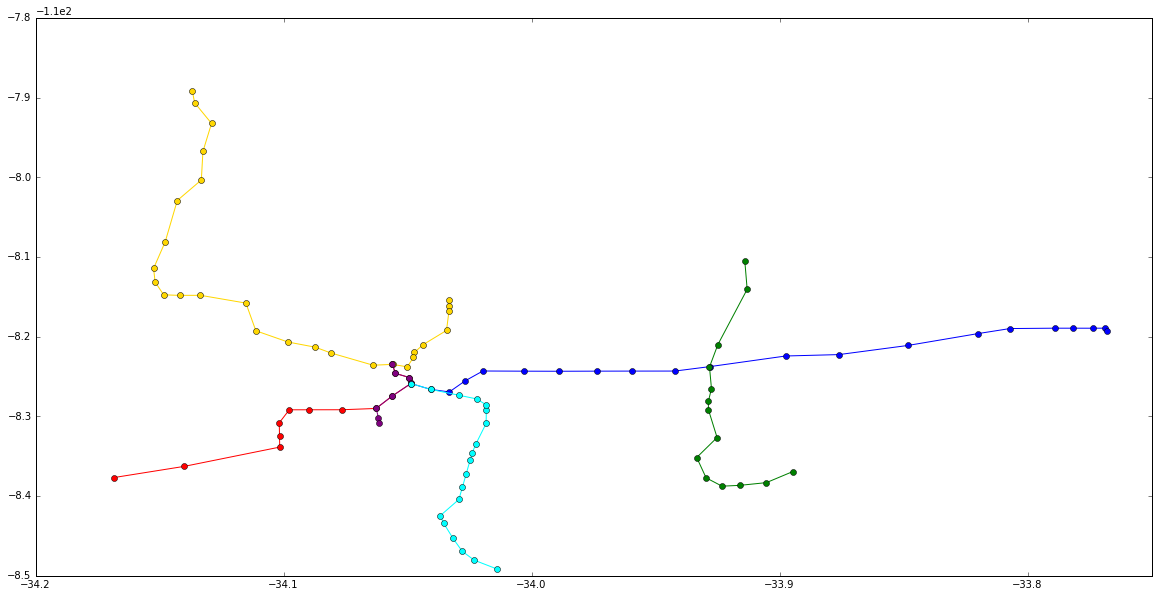

In [10]:
lametro_map =plt.figure(figsize=(20,10))
for route in stops:
    current_color = routes[route]['color']
    latitudes = []
    longitudes = []
    for stop in stops[route]:
        #Horizontal flip to align with the other map
        latitudes.append(-1*stop['latitude'])
        longitudes.append(stop['longitude'])
    plt.plot(latitudes,longitudes, color=current_color, linestyle="solid", marker="o")


Compare it to a screenshot of the 2-D map available from the official LA-metro site

<img src="LAMetro-map-screenshot.png" style="width:400px" />

In [11]:
#Computing distances between each stop and the previous stop for each route
# (prev-current is in direction 0)
stop_coordinates_and_distances = {}
for route in stops:
    stop_coordinates_and_distances[route] = {}
    stop_sequence = [stops[route][0]['id']]
    stop_sequence_coordinates = [(stops[route][0]['latitude'], stops[route][0]['longitude'])]
    prev_stop_coordinates = np.array(list(stop_sequence_coordinates[0]))
    stop_distances = []
    for stop_details in stops[route][1:]:
        stop_sequence.append(stop_details['id'])
        stop_sequence_coordinates.append((stop_details['latitude'],stop_details['longitude']))
        current_stop_coordinates = np.array(list(stop_sequence_coordinates[-1]))
        distance = np.linalg.norm(current_stop_coordinates-prev_stop_coordinates)
        stop_distances.append(distance)
        prev_stop_coordinates = current_stop_coordinates
        
    stop_coordinates_and_distances[route]['no_of_stops'] = len(stop_sequence)     
    stop_coordinates_and_distances[route]['stop_sequence'] = stop_sequence
    stop_coordinates_and_distances[route]['stop_coordinates'] = stop_sequence_coordinates
    stop_coordinates_and_distances[route]['stop_distances'] = stop_distances

    

In [12]:
#Range of distances between consecutive stops
maximum_consecutive_distance = -math.inf
minimum_consecutive_distance = math.inf

maximum_endtoend_distance = -math.inf
minimum_endtoend_distance = math.inf
for route in stop_coordinates_and_distances:
    minimum_consecutive_distance = min(minimum_consecutive_distance, 
                           min(stop_coordinates_and_distances[route]['stop_distances']))
    maximum_consecutive_distance = max(maximum_consecutive_distance, 
                           max(stop_coordinates_and_distances[route]['stop_distances']))
    stop_coordinates_and_distances[route]['end_to_end'] = sum(stop_coordinates_and_distances[route]['stop_distances'])
    minimum_endtoend_distance = min(minimum_endtoend_distance, stop_coordinates_and_distances[route]['end_to_end'])
    maximum_endtoend_distance = max(maximum_endtoend_distance,stop_coordinates_and_distances[route]['end_to_end'])


print(f"min consecutive = {minimum_consecutive_distance}, max consecutive ={maximum_consecutive_distance}")
print(f"min end to end = {minimum_endtoend_distance}, max end to end ={maximum_endtoend_distance}")



min consecutive = 0.003622499137343108, max consecutive =0.07033855059637988
min end to end = 0.08009994964920097, max end to end =0.4960366022114363


In [13]:
#Scaling distances between each stop and the previous stop for each route
# (prev-current is in direction 0)
#end_to_end units-> s inches, d units -> ds/end_to_end 

screen_width = 10

for route in stop_coordinates_and_distances:
    stop_distances = stop_coordinates_and_distances[route]['stop_distances'] 
    end_to_end = stop_coordinates_and_distances[route]['end_to_end']
    stop_coordinates_and_distances[route]['scaled_distances'] = list(map(lambda x: round(x*screen_width/end_to_end, 3),stop_distances))
    stop_coordinates_and_distances[route]['scaled_end_to_end'] = round(2*stop_coordinates_and_distances[route]['end_to_end']*screen_width , 3)
    

In [14]:
for route in stop_coordinates_and_distances:
    print(f" Route {route} : end-to-end on screen {stop_coordinates_and_distances[route]['scaled_end_to_end']}")
    print(stop_coordinates_and_distances[route]['scaled_distances'])

 Route 801 : end-to-end on screen 6.288
[0.342, 0.262, 0.484, 0.456, 0.532, 0.45, 0.478, 0.449, 0.553, 0.485, 1.06, 0.683, 0.958, 1.019, 0.453, 0.572, 0.231, 0.262, 0.155, 0.115]
 Route 802 : end-to-end on screen 4.419
[1.439, 2.055, 0.605, 0.772, 0.763, 0.353, 0.606, 0.63, 0.745, 0.813, 0.337, 0.345, 0.538]
 Route 803 : end-to-end on screen 6.475
[0.541, 0.349, 0.223, 0.379, 0.797, 0.814, 1.081, 0.328, 0.492, 0.84, 0.875, 2.173, 1.109]
 Route 804 : end-to-end on screen 9.921
[0.136, 0.14, 0.485, 0.408, 0.206, 0.127, 0.246, 0.136, 0.159, 0.464, 0.193, 0.258, 0.386, 0.705, 0.419, 0.169, 0.131, 0.332, 0.344, 0.675, 1.053, 0.554, 0.722, 0.712, 0.539, 0.303]
 Route 805 : end-to-end on screen 1.602
[1.483, 0.952, 0.93, 2.241, 2.056, 1.426, 0.911]
 Route 806 : end-to-end on screen 5.086
[0.563, 0.481, 0.654, 0.749, 0.384, 0.852, 0.603, 0.666, 0.67, 0.358, 0.437, 1.042, 0.683, 0.228, 0.336, 0.327, 0.543, 0.422]


In [15]:
pprint.pprint(stop_coordinates_and_distances)

{'801': {'end_to_end': 0.31438282845947363,
         'no_of_stops': 21,
         'scaled_distances': [0.342,
                              0.262,
                              0.484,
                              0.456,
                              0.532,
                              0.45,
                              0.478,
                              0.449,
                              0.553,
                              0.485,
                              1.06,
                              0.683,
                              0.958,
                              1.019,
                              0.453,
                              0.572,
                              0.231,
                              0.262,
                              0.155,
                              0.115],
         'scaled_end_to_end': 6.288,
         'stop_coordinates': [(34.0486099, -118.25882),
                              (34.0407299, -118.26612),
                              (34.033159

# A linearized representation of the LA-Metro rail routes

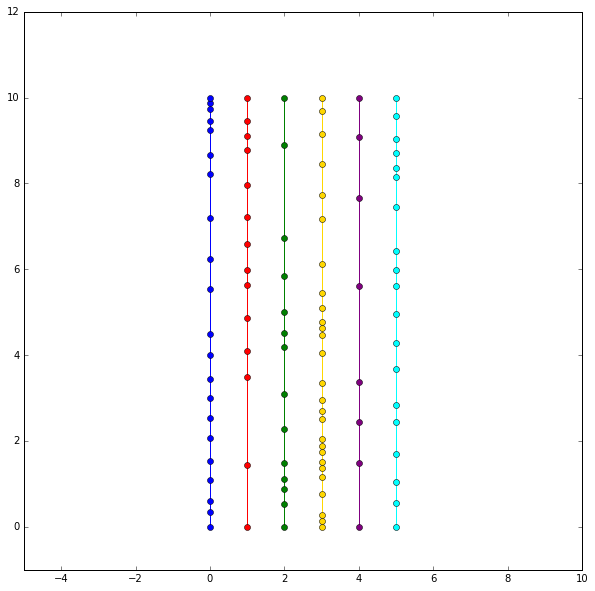

In [16]:
linearized_map =plt.figure(figsize=(10,10))
for i, route in enumerate(stops):
    current_color = routes[route]['color']
    xs = [i]
    ys = [0]
    stop_distances = stop_coordinates_and_distances[route]['scaled_distances']
    for distance in stop_distances:
        xs.append(xs[-1])
        ys.append(ys[-1]+distance)
    plt.plot(xs, ys, color=current_color, linestyle="solid", marker="o")
plt.xlim(-5,10)
plt.ylim(-1,12);



# Current vehicular data

In [17]:
#Getting the current vehicular data 
res = requests.get(f"https://api.metro.net/agencies/{agency}/vehicles/")
#print(res.json())
pprint.pprint(res.json()['items'][0])



{'heading': 270.0,
 'id': '204',
 'latitude': 34.062354,
 'longitude': -118.289518,
 'predictable': True,
 'route_id': '805',
 'run_id': '805_1_var0',
 'seconds_since_report': 22}


In [18]:
#Storing current vehicular data
current_vehicles = {}
route_wise_current_vehicles = {}
for route in routes:
    route_wise_current_vehicles[route] = defaultdict(list)
res = requests.get(f"https://api.metro.net/agencies/{agency}/vehicles/")
for vehicle in res.json()['items']:
    vehicle_id = vehicle['id']
    current_vehicles[vehicle_id] = vehicle.copy()
    current_route = vehicle['route_id']
    route_wise_current_vehicles[current_route]['latitudes'].append(vehicle['latitude'])
    route_wise_current_vehicles[current_route]['longitudes'].append(vehicle['longitude'])
    route_wise_current_vehicles[current_route]['run_id'].append(vehicle['run_id'])
for route in routes:
    route_wise_current_vehicles[route]['no_of_vehicles'] = len(route_wise_current_vehicles[route]['longitudes'])
print(f"Number of current vehicles = {len(current_vehicles)}")
print()
print("*********")
pprint.pprint(current_vehicles)
pprint.pprint(route_wise_current_vehicles)

Number of current vehicles = 40

*********
{'102': {'heading': 180.0,
         'id': '102',
         'latitude': 33.840262,
         'longitude': -118.207608,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_1_var0',
         'seconds_since_report': 34},
 '105': {'heading': 180.0,
         'id': '105',
         'latitude': 34.026877,
         'longitude': -118.255756,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_1_var0',
         'seconds_since_report': 6},
 '106': {'heading': 0.0,
         'id': '106',
         'latitude': 33.8877359,
         'longitude': -118.223569,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_0_var0',
         'seconds_since_report': 6},
 '107': {'heading': 0.0,
         'id': '107',
         'latitude': 33.794189,
         'longitude': -118.189324,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_0_var0',
         'seconds_si

# Rough display of current vehicles in the map plot 

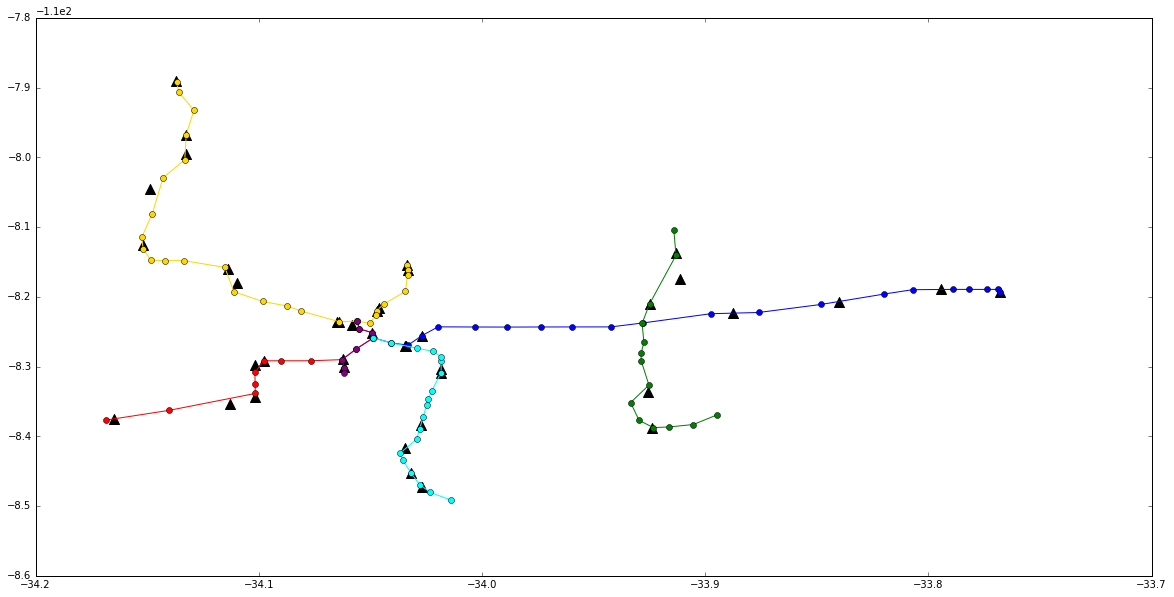

In [19]:
lametro_map_with_current_vehicles =plt.figure(figsize=(20,10))
for route in routes:
    current_color = routes[route]['color']
    latitudes = []
    longitudes = []
    for stop in stops[route]:
        #Horizontal flip to align with the other map
        latitudes.append(-1*stop['latitude'])
        longitudes.append(stop['longitude'])
    current_vehicles_latitudes = list(map(lambda x: -1*x, route_wise_current_vehicles[route]['latitudes']))
    current_vehicles_longitudes = route_wise_current_vehicles[route]['longitudes']
    plt.plot(latitudes,longitudes, color=current_color, linestyle='solid', marker="o")
    plt.scatter(current_vehicles_latitudes, current_vehicles_longitudes, color ="black", marker ="^", s=100)




